# BASIC CONFORMAL

In [1]:
#import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler, LabelEncoder
#zaczytanie danych
train = pd.read_csv(r"C:\Users\AntoSzu\Downloads\data_green\train_green.csv")
test = pd.read_csv(r"C:\Users\AntoSzu\Downloads\data_green\test_green.csv")

In [2]:
#wyznaczenie kwantyli na zbiorze treningowym
predictions = train[["PRED","PRED"]]
target = train[["TARGET"]]

predictions = predictions.values
target = target.values
target = LabelEncoder().fit_transform(target)
n = len(target)

predictions[:,0] = 1-predictions[:,0]

prob_true_class = predictions[np.arange(len(target)),target]

qhat_95 = np.quantile(1 - prob_true_class, np.ceil((n+1)*(1-0.05))/n)
qhat_90 = np.quantile(1 - prob_true_class, np.ceil((n+1)*(1-0.1))/n)
qhat_80 = np.quantile(1 - prob_true_class, np.ceil((n+1)*(1-0.2))/n)

C:\Users\AntoSzu\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
predictions_test = test[["PRED","PRED"]]
predictions_test = predictions_test.values

predictions_test[:,0] = 1-predictions_test[:,0]

sets_95 = (1-predictions_test <= qhat_95)
sets_90 = (1-predictions_test <= qhat_90)
sets_80 = (1-predictions_test <= qhat_80)

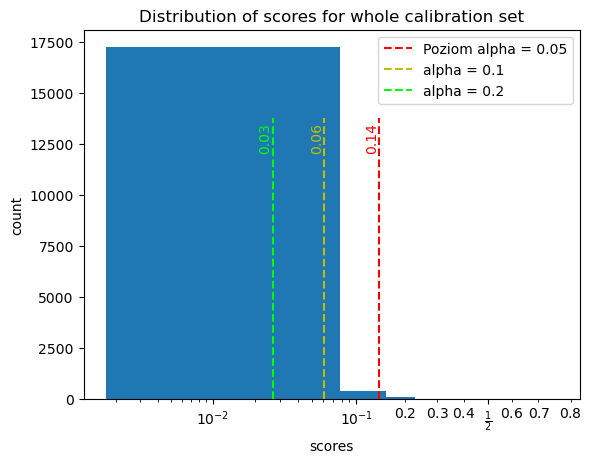

In [4]:
plt.clf()
plt.hist(predictions_test[:,1])
xmin, xmax, ymin, ymax = plt.axis()
plt.axvline(x=qhat_95, color='r', linestyle='--', ymax = 0.76, label = f'Poziom alpha = {0.05}')
plt.text(qhat_95, 0.75*ymax, f'{np.round(qhat_95,2)}', color='r', ha='right', va='top', rotation=90)
plt.axvline(x=qhat_90, color='y', linestyle='--' ,ymax = 0.76, label = f'alpha = {0.1}')
plt.text(qhat_90, 0.75*ymax, f'{np.round(qhat_90,2)}', color='y', ha='right', va='top', rotation=90)
plt.axvline(x=qhat_80, color='lime', linestyle='--', ymax = 0.76, label = f'alpha = {0.2}')
plt.text(qhat_80, 0.75*ymax, f'{np.round(qhat_80,2)}', color='lime', ha='right', va='top', rotation=90)
plt.xscale('logit')
plt.legend(loc = 'upper right')
plt.xlabel('scores')
plt.ylabel('count')
plt.title('Distribution of scores for whole calibration set')
plt.show()

# CONDITIONAL ON CLASS

In [5]:
#zaczytanie danych
train = pd.read_csv(r"C:\Users\AntoSzu\Downloads\data_green\train_green.csv")
test = pd.read_csv(r"C:\Users\AntoSzu\Downloads\data_green\test_green.csv")
#w zadaniu 1 X to predykcja z modelu
X_train = train['PRED']
y_train = train['TARGET']
X_test = test['PRED']
y_test= test['TARGET']

## ALL CLIENTS

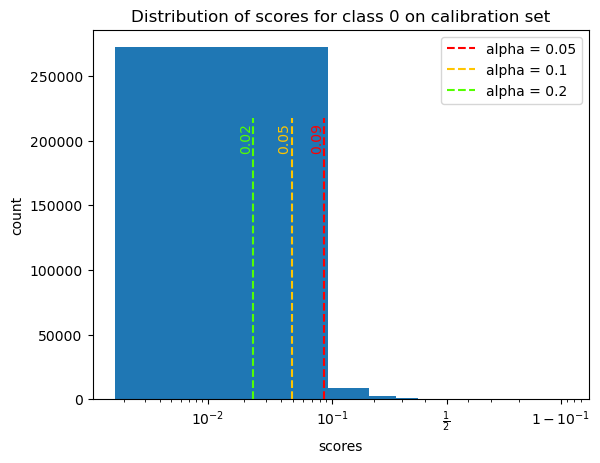

In [6]:
#żądana dokładność 1-alpha
alphas = [0.05,0.1,0.2]
cmap = plt.get_cmap('prism', len(alphas))
class_0_quantiles_total = []
class_1_quantiles_total = []
X_train_0 = X_train[y_train==0]
prob_0 = np.array(X_train_0)
n_0 = len(X_train_0)
plt.hist(prob_0)
xmin, xmax, ymin, ymax = plt.axis()
for alpha in alphas:
    #kwantyl i histogram scorów dla klasy 0
    #pred to prawdopodobieństwo przynależności do klasy 1, stąd dla klasy 0 jest to uncertainty score
    #(im wyższy tym mniejsza zgodność, że obserwacja jest z klasy 0)
    qhat_0 = np.quantile(prob_0, np.ceil((n_0+1)*(1-alpha))/n_0,method = 'higher')
    class_0_quantiles_total.append(qhat_0)
    plt.axvline(x=qhat_0,ymin=0, ymax=0.76, label = f'alpha = {alpha}',color = cmap(alphas.index(alpha)), linestyle = '--')
    plt.text(qhat_0, 0.75*ymax, f'{np.round(qhat_0,2)}', color=cmap(alphas.index(alpha)), ha='right', va='top', rotation=90)
#plt.axvline(x=qhat_0,ymin=0, ymax=0.76, color = 'red', label = f'alpha = {alpha}', linestyle = '--')
plt.legend(loc = 'upper right')
plt.xlabel('scores')
plt.ylabel('count')
plt.xscale('logit')
plt.title('Distribution of scores for class 0 on calibration set')
plt.show()

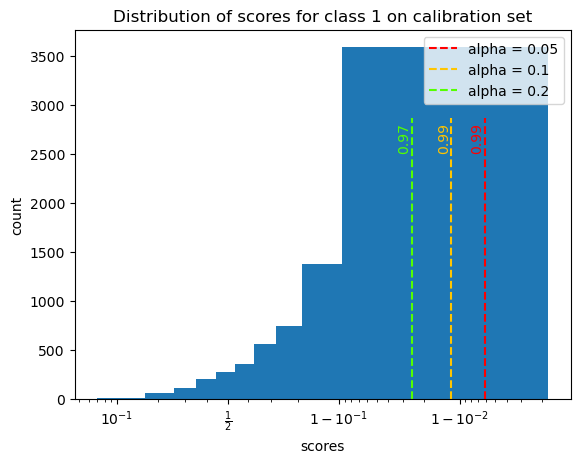

In [7]:
#kwantyl i histogram scorów dla klasy 1
class_1_quantiles_total = []
X_train_1 = X_train[y_train==1]
prob_1 = np.array(X_train_1)
n_1 = len(X_train_1)
plt.hist(1-prob_1)
xmin, xmax, ymin, ymax = plt.axis()
for alpha in alphas:
    #kwantyl i histogram scorów dla klasy 0
    #pred to prawdopodobieństwo przynależności do klasy 1, stąd dla klasy 0 jest to uncertainty score
    #(im wyższy tym mniejsza zgodność, że obserwacja jest z klasy 0)
    qhat_1 = np.quantile(1-prob_1, np.ceil((n_1+1)*(1-alpha))/n_1,method = 'higher')
    class_1_quantiles_total.append(qhat_1)
    plt.axvline(x=qhat_1,ymin=0, ymax=0.76, label = f'alpha = {alpha}',color = cmap(alphas.index(alpha)), linestyle = '--')
    plt.text(qhat_1, 0.75*ymax, f'{np.round(qhat_1,2)}', color=cmap(alphas.index(alpha)), ha='right', va='top', rotation=90)
#plt.axvline(x=qhat_0,ymin=0, ymax=0.76, color = 'red', label = f'alpha = {alpha}', linestyle = '--')
plt.legend(loc = 'upper right')
plt.xlabel('scores')
plt.ylabel('count')
plt.xscale('logit')
plt.title('Distribution of scores for class 1 on calibration set')
plt.show()

1-alpha = 0.95, pokrycie dla klasy 0: 0.9776357827476039
1-alpha = 0.95, pokrycie dla klasy 1: 0.920863309352518
1-alpha = 0.95, średnie pokrycie: 0.976749410311131


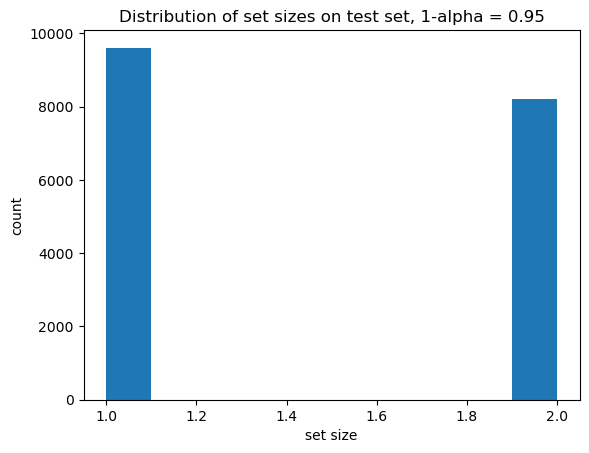

1-alpha = 0.9, pokrycie dla klasy 0: 0.9423208580556823
1-alpha = 0.9, pokrycie dla klasy 1: 0.8453237410071942
1-alpha = 0.9, średnie pokrycie: 0.9408064697293047


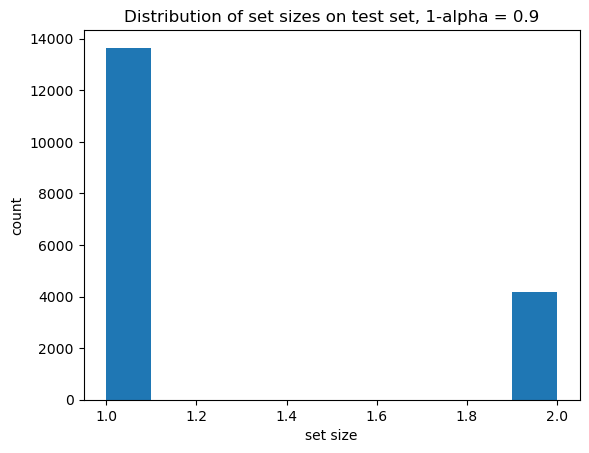

1-alpha = 0.8, pokrycie dla klasy 0: 0.8512094933820173
1-alpha = 0.8, pokrycie dla klasy 1: 0.7050359712230215
1-alpha = 0.8, średnie pokrycie: 0.8489273278670111


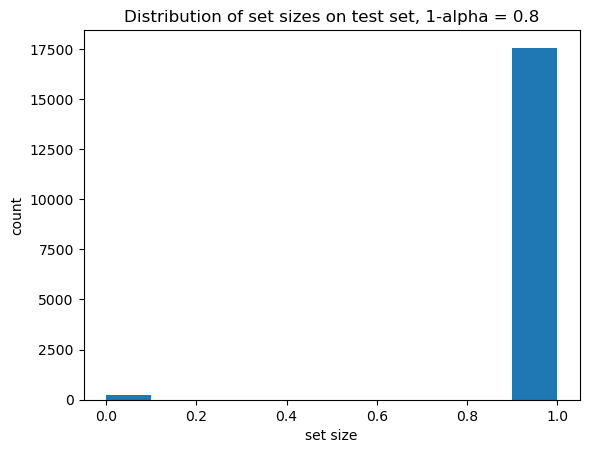

In [8]:
for alpha in alphas:

    #predykcja dla klasy 0
    pred_0 = (X_test <= class_0_quantiles_total[alphas.index(alpha)])
    #predykcja dla klasy 1
    pred_1 = (1-X_test <= class_1_quantiles_total[alphas.index(alpha)])
    df_pred = pd.DataFrame(columns = [])

    #pred class 0: 1 jeśli zaklasyfikowane do klasy 0, 0 wpp
    df_pred['pred class 0'] = 1*pred_0
    #pred class 1: 1 jeśli zaklasyfikowane do klasy 1, 0 wpp
    df_pred['pred class 1'] = 1 * pred_1
    df_pred['TARGET'] = pd.to_numeric(test['TARGET'], downcast = 'integer')

    #pokrycie: jeśli target = 0 oraz pred class 0 = 1 lub jeśli target = 1 oraz pred class 1 = 1
    df_pred['coverage'] = 1*(((df_pred['TARGET']==0)&(1-df_pred['TARGET']==df_pred['pred class 0'])) | ((df_pred['TARGET']==1)& (df_pred['TARGET']==df_pred['pred class 1'])))
    #pokrycie dla klasy 0
    print(f"1-alpha = {1-alpha}, pokrycie dla klasy 0: {df_pred[df_pred['TARGET']==0]['coverage'].sum()/len(df_pred[df_pred['TARGET']==0])}")
    #pokrycie dla klasy 1
    print(f"1-alpha = {1-alpha}, pokrycie dla klasy 1: {df_pred[df_pred['TARGET']==1]['coverage'].sum()/len(df_pred[df_pred['TARGET']==1])}")
    #pokrycie dla klasy 1 jest niewystarczające do conditional class
    #średnie pokrycie
    print(f"1-alpha = {1-alpha}, średnie pokrycie: {df_pred['coverage'].sum()/len(df_pred)}")
    #set_size
    df_pred['set_size'] = df_pred['pred class 0']+ df_pred['pred class 1']
    #histogram
    plt.hist(df_pred['set_size'])
    plt.xlabel('set size')
    plt.ylabel('count')
    plt.title(f'Distribution of set sizes on test set, 1-alpha = {1-alpha}')
    plt.show()

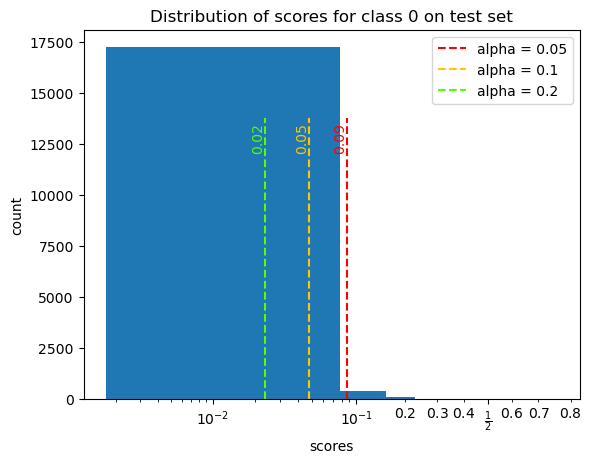

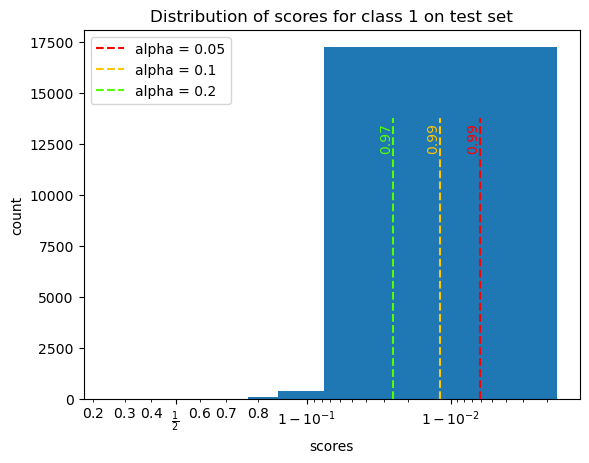

In [9]:
#histogram dla scorów klasy 0 na zbiorze testowym wraz z kwantylem ze zbioru kalibracyjnego
plt.hist(X_test)
xmin, xmax, ymin, ymax = plt.axis()
for alpha in alphas:

    plt.axvline(x=class_0_quantiles_total[alphas.index(alpha)],ymin=0, ymax=0.76, label = f'alpha = {alpha}',color = cmap(alphas.index(alpha)), linestyle = '--')
    plt.text(class_0_quantiles_total[alphas.index(alpha)], 0.75*ymax, f'{np.round(class_0_quantiles_total[alphas.index(alpha)],2)}', color=cmap(alphas.index(alpha)), ha='right', va='top', rotation=90)
plt.legend(loc = 'upper right')
plt.xlabel('scores')
plt.ylabel('count')
plt.xscale('logit')
plt.title('Distribution of scores for class 0 on test set')
plt.show()
#histogram dla scorów klasy 1 na zbiorze testowym wraz z kwantylem ze zbioru kalibracyjnego
plt.hist(1-X_test)
xmin, xmax, ymin, ymax = plt.axis()
for alpha in alphas:

    plt.axvline(x=class_1_quantiles_total[alphas.index(alpha)],ymin=0, ymax=0.76, label = f'alpha = {alpha}',color = cmap(alphas.index(alpha)), linestyle = '--')
    plt.text(class_1_quantiles_total[alphas.index(alpha)], 0.75*ymax, f'{np.round(class_1_quantiles_total[alphas.index(alpha)],2)}', color=cmap(alphas.index(alpha)), ha='right', va='top', rotation=90)
plt.legend(loc = 'upper left')
plt.xlabel('scores')
plt.ylabel('count')
plt.xscale('logit')
plt.title('Distribution of scores for class 1 on test set')
plt.show()

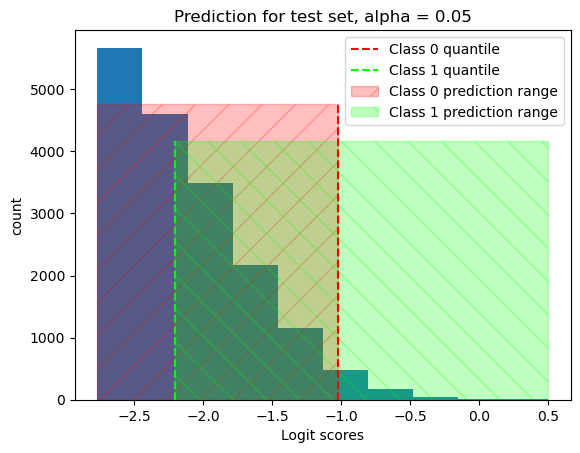

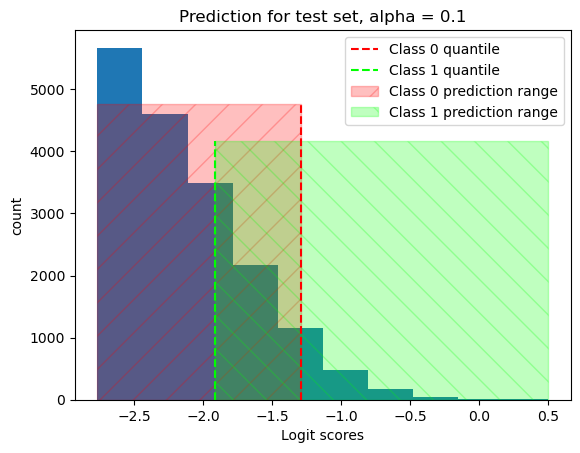

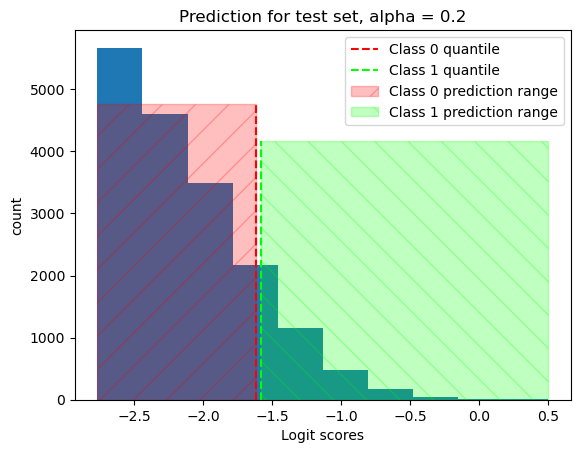

In [10]:
#histogram z przyporządkowaniem do klas dla zbioru testowego
#funkcja do transformacji logitowej (axvspan nie współpracuje z xscale)
def logit_hist(x):
    return np.log10(x/(1-x))
for alpha in alphas:
    plt.hist(logit_hist(X_test))
    #plt.xlim(xmin = 0.000001, xmax = 0.99999)
    xmin, xmax, ymin, ymax = plt.axis()
    plt.axvline(x=logit_hist(class_0_quantiles_total[alphas.index(alpha)]),ymin=ymin, ymax=0.8, label = f'Class 0 quantile',color = 'r', linestyle = '--')
    plt.axvline(x=logit_hist(1-class_1_quantiles_total[alphas.index(alpha)]),ymin=0, ymax=0.7, label = f'Class 1 quantile',color = 'lime', linestyle = '--')
    plt.axvspan(xmin = logit_hist(np.min(X_test)), xmax = logit_hist(class_0_quantiles_total[alphas.index(alpha)]),ymin = 0, ymax = 0.8, color='red', alpha=0.25, label = 'Class 0 prediction range', hatch = '/')
    plt.axvspan(xmin = logit_hist(1-class_1_quantiles_total[alphas.index(alpha)]), xmax = logit_hist(np.max(X_test)),ymin = ymin, ymax = 0.7, color='lime', alpha=0.25, label = 'Class 1 prediction range', hatch = '\\')
    #plt.xscale('logit')
    plt.xlabel('Logit scores')
    plt.ylabel('count')
    plt.title(f'Prediction for test set, alpha = {alpha}')
    plt.legend(loc = 'upper right')
    plt.show()

## SEGMENTATION

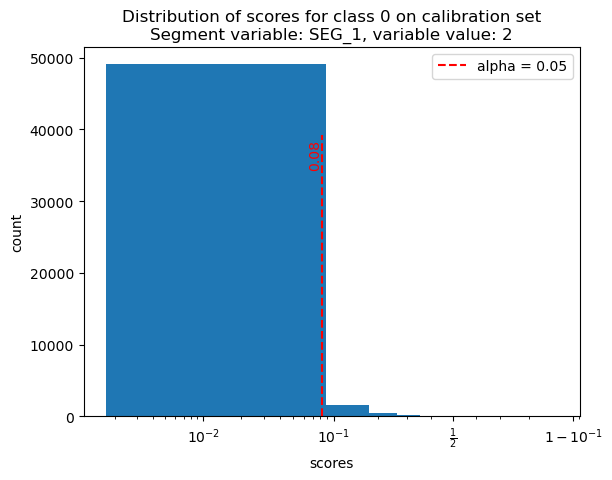

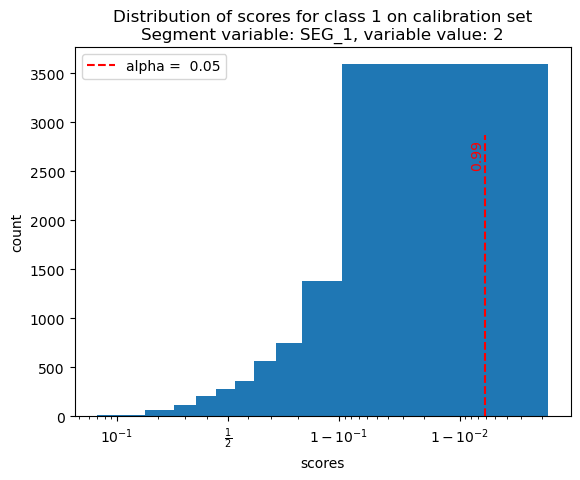

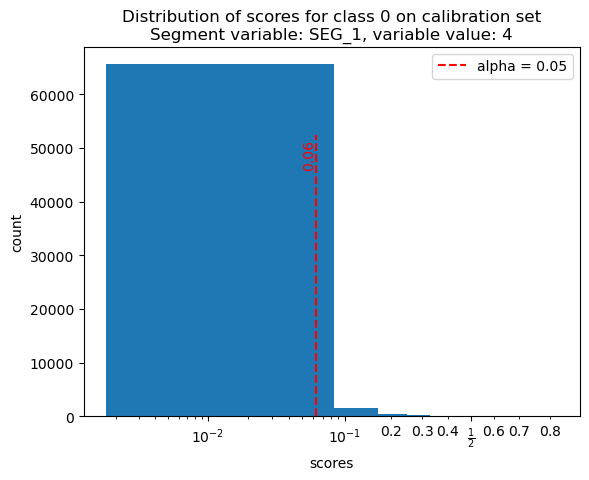

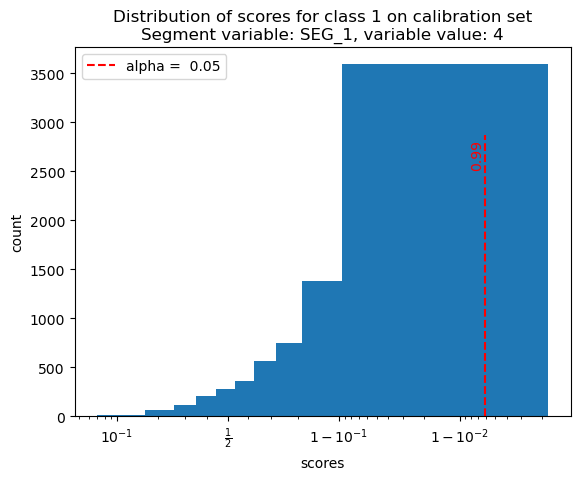

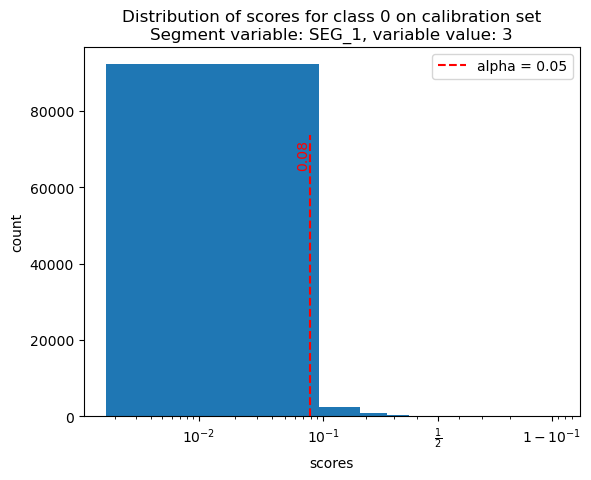

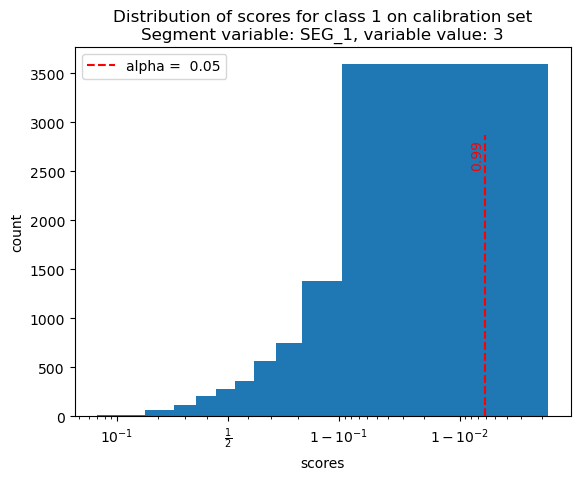

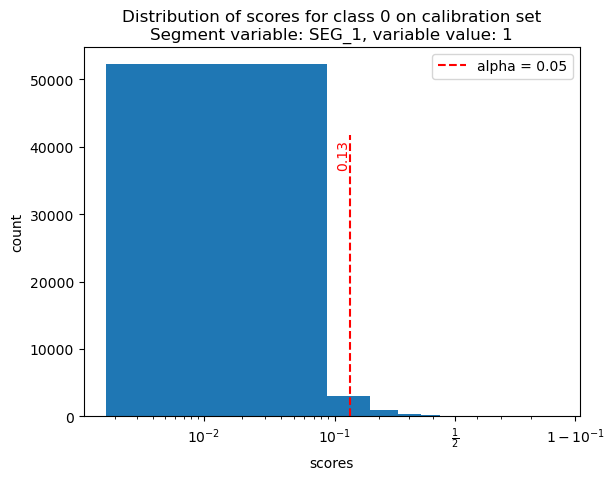

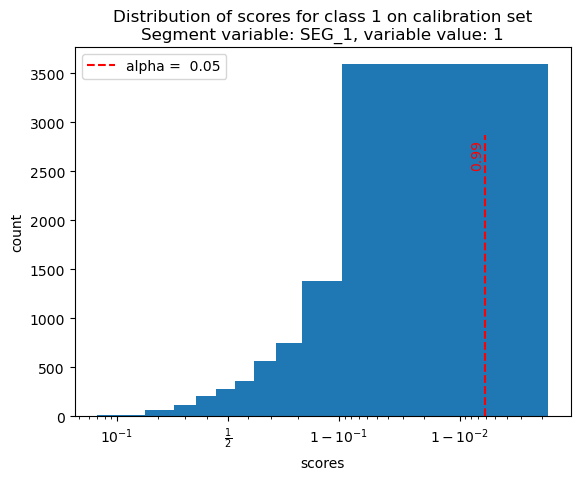

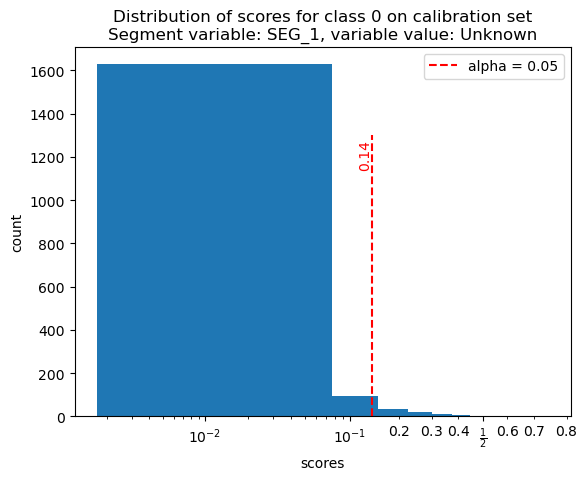

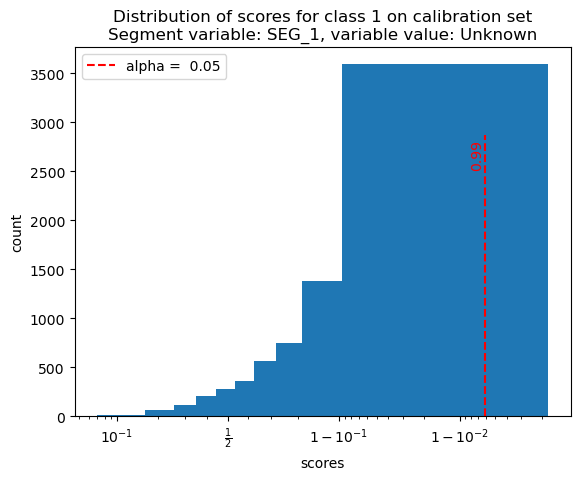

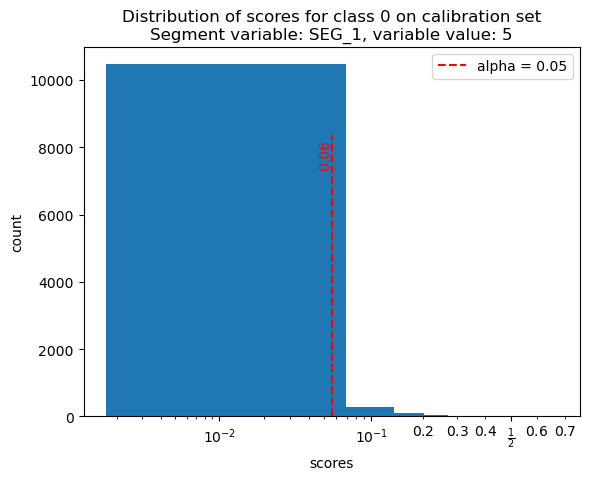

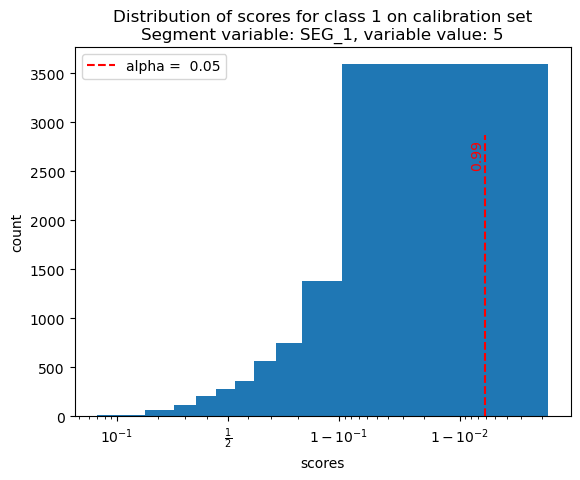

In [11]:
#żądana dokładność 1-alpha
alpha_seg = 0.05
#wybór zmiennej segmentacyjnej
seg_variable = 'SEG_1'
class_0_quantiles = []
class_1_quantiles = []
#unikatowe wartości
list_unique = train[seg_variable].unique()
#kalibracja dla każdej podgrupy
for unique_val in list_unique:

    #kwantyl i histogram scorów dla klasy 0
    X_train_0 = X_train[(train[seg_variable]==unique_val)& (y_train==0)]
    prob_0 = np.array(X_train_0)
    n_0 = len(X_train_0)
    #pred to prawdopodobieństwo przynależności do klasy 1, stąd dla klasy 0 jest to uncertainty score
    #(im wyższy tym mniejsza zgodność, że obserwacja jest z klasy 0)
    qhat_0 = np.quantile(prob_0, np.ceil((n_0+1)*(1-alpha_seg))/n_0,method = 'higher')
    class_0_quantiles.append(qhat_0)
    plt.hist(prob_0)
    xmin, xmax, ymin, ymax = plt.axis()
    plt.axvline(x=qhat_0,ymin=0, ymax=0.76, color = 'red', label = f'alpha = {alpha_seg}', linestyle = '--')
    plt.text(qhat_0, 0.75*ymax, f'{np.round(qhat_0,2)}', color='r', ha='right', va='top', rotation=90)
    plt.title(f"Distribution of scores for class 0 on calibration set\nSegment variable: {seg_variable}, variable value: {unique_val}")
    plt.legend(loc = 'upper right')
    plt.xlabel('scores')
    plt.ylabel('count')
    plt.xscale('logit')
    plt.show()
    #kwantyl i histogram scorów dla klasy 1
    X_train_1 = X_train[y_train==1]
    prob_1 = np.array(X_train_1)
    n_1 = len(X_train_1)
    #pred to prawdopodobieństwo przynależności do klasy 1, stąd dla klasy 1 jest to 1-  uncertainty score
    #(im wyższy tym mniejsza zgodność, że obserwacja jest z klasy 0)
    qhat_1 = np.quantile(1-prob_1, np.ceil((n_1+1)*(1-alpha_seg))/n_1,method = 'higher')
    class_1_quantiles.append(qhat_1)
    plt.hist(1-prob_1)
    xmin, xmax, ymin, ymax = plt.axis()
    plt.axvline(x=qhat_1,ymin=0, ymax=0.76, color = 'red', label = f'alpha =  {alpha_seg}', linestyle = '--')
    plt.text(qhat_1, 0.75*ymax, f'{np.round(qhat_1,2)}', color='r', ha='right', va='top', rotation=90)
    plt.title(f"Distribution of scores for class 1 on calibration set\nSegment variable: {seg_variable}, variable value: {unique_val}")
    plt.legend(loc = 'upper left')
    plt.xlabel('scores')
    plt.ylabel('count')
    plt.xscale('logit')
    plt.show()

Zmienna SEG_1, grupa 1, pokrycie dla klasy 0: 0.9872220802453361
Zmienna SEG_1, grupa 1, pokrycie dla klasy 1: 0.9259259259259259
Zmienna SEG_1, grupa 1, średnie pokrycie: 0.9859789684526791


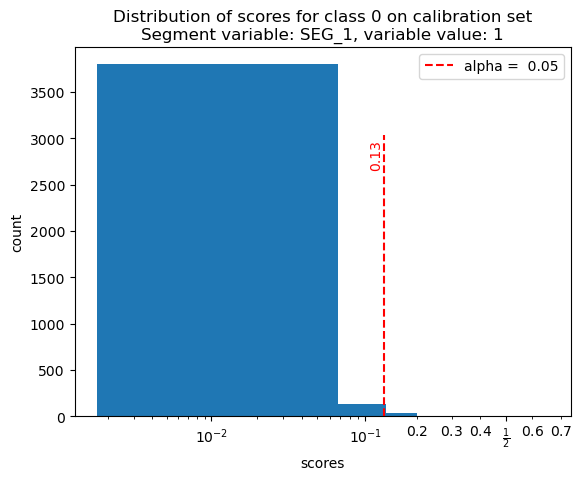

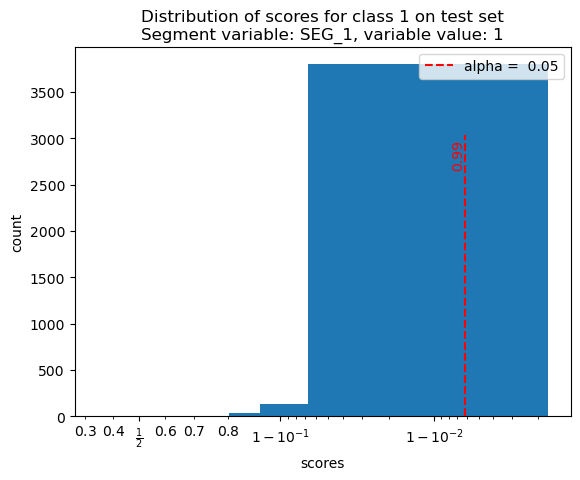

Zmienna SEG_1, grupa 4, pokrycie dla klasy 0: 0.9692270992366412
Zmienna SEG_1, grupa 4, pokrycie dla klasy 1: 0.9333333333333333
Zmienna SEG_1, grupa 4, średnie pokrycie: 0.9688458815199433


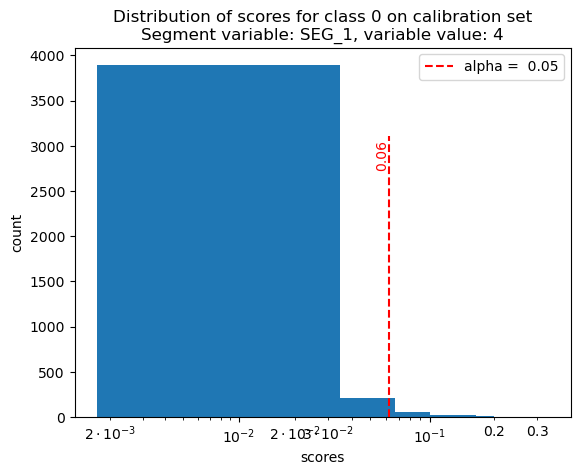

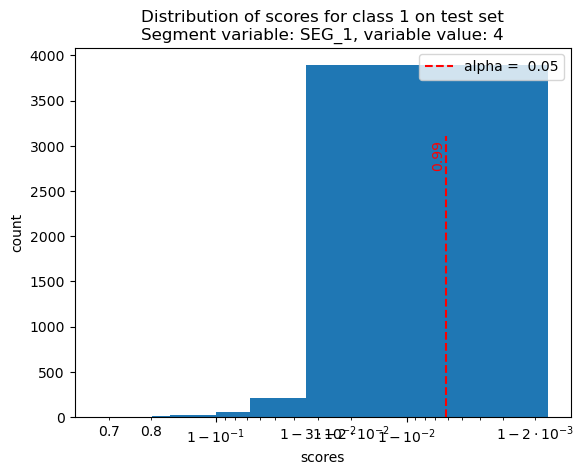

Zmienna SEG_1, grupa 3, pokrycie dla klasy 0: 0.970745629682483
Zmienna SEG_1, grupa 3, pokrycie dla klasy 1: 0.8924731182795699
Zmienna SEG_1, grupa 3, średnie pokrycie: 0.9694683277768029


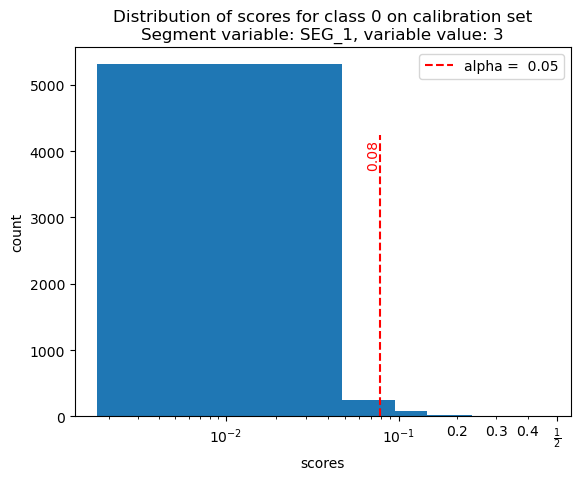

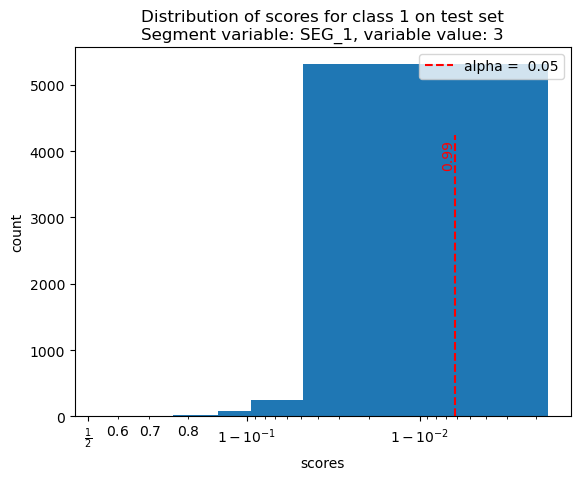

Zmienna SEG_1, grupa 2, pokrycie dla klasy 0: 0.9744847890088322
Zmienna SEG_1, grupa 2, pokrycie dla klasy 1: 0.9555555555555556
Zmienna SEG_1, grupa 2, średnie pokrycie: 0.9742101869761445


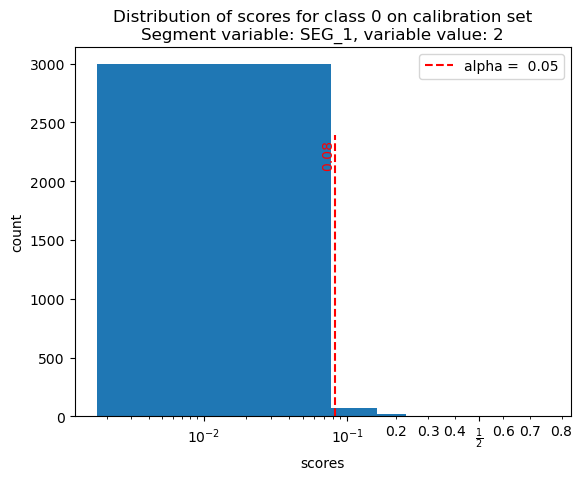

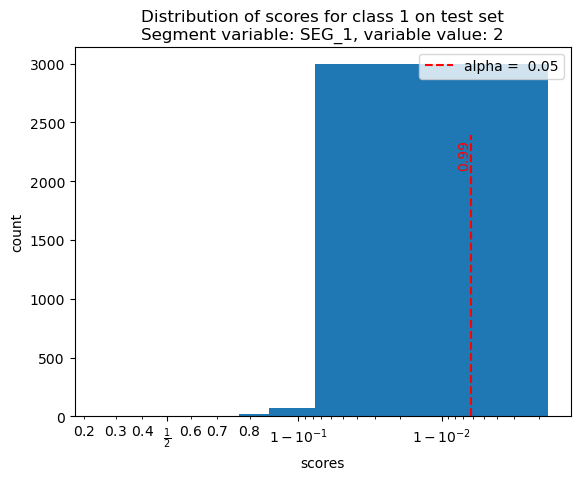

Zmienna SEG_1, grupa 5, pokrycie dla klasy 0: 0.9808541973490427
Zmienna SEG_1, grupa 5, pokrycie dla klasy 1: 0.9230769230769231
Zmienna SEG_1, grupa 5, średnie pokrycie: 0.9797687861271677


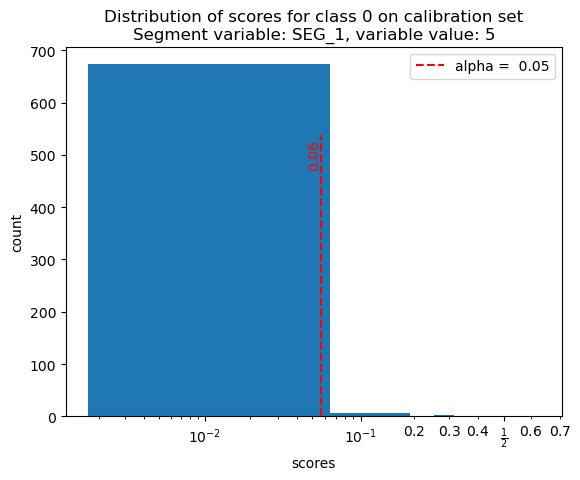

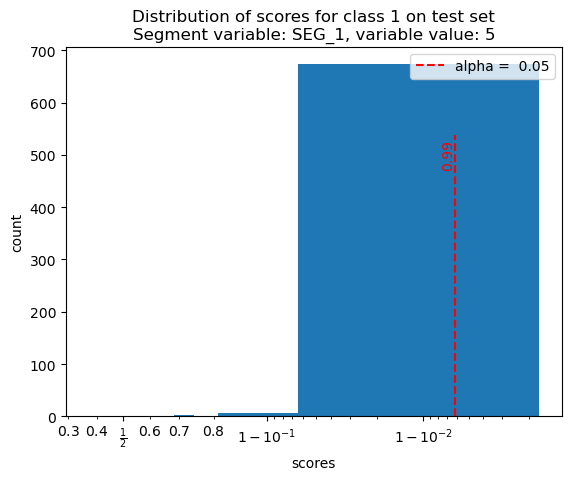

Zmienna SEG_1, grupa Unknown, pokrycie dla klasy 0: 1.0
Zmienna SEG_1, grupa Unknown, pokrycie dla klasy 1: 1.0
Zmienna SEG_1, grupa Unknown, średnie pokrycie: 1.0


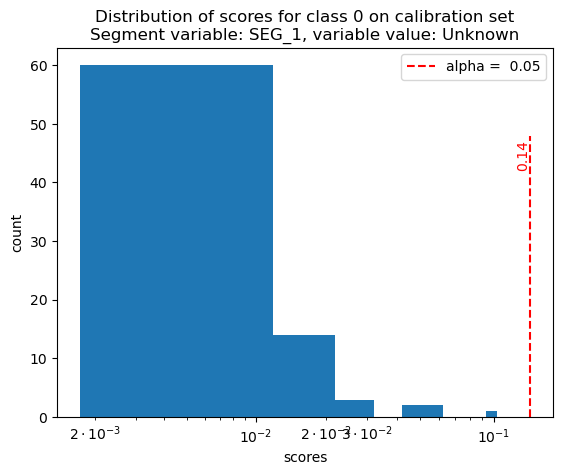

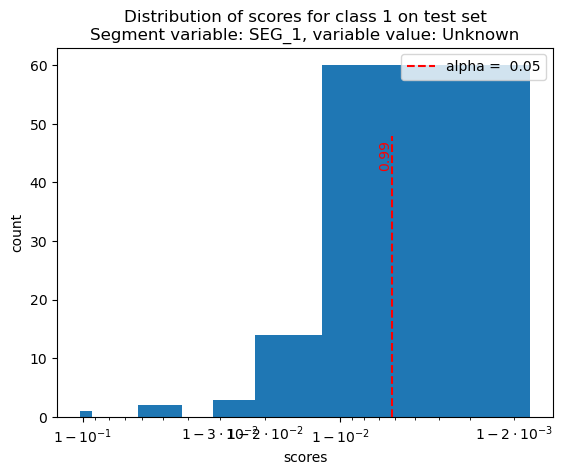

,pred class 0,pred class 1,TARGET,SEG_1,coverage
0,0,1,0,1,1
1,0,1,0,1,1
2,0,0,0,1,1
3,0,0,1,1,0
4,0,0,0,1,1
...,...,...,...,...,...
17801,0,1,0,Unknown,1
17802,0,1,0,Unknown,1
17803,0,1,0,Unknown,1
17804,0,1,0,Unknown,1


In [12]:
total_results = pd.DataFrame(columns = [])
for unique_val in test[seg_variable].unique():
    #podzbiór X_test
    X_test_sub = X_test[test[seg_variable]==unique_val]
    #predykcja dla klasy 0
    pred_0 = (X_test_sub <= class_0_quantiles[list(list_unique).index(unique_val)])
    #predykcja dla klasy 1
    pred_1 = (1-X_test_sub <= class_1_quantiles[list(list_unique).index(unique_val)])
    df_pred = pd.DataFrame(columns = [])

    #pred class 0: 0 jeśli zaklasyfikowane do klasy 0, 1 wpp
    df_pred['pred class 0'] = (1-1*pred_0)
    #pred class 1: 1 jeśli zaklasyfikowane do klasy 1, 0 wpp
    df_pred['pred class 1'] = 1 * pred_1
    df_pred['TARGET'] = pd.to_numeric(test[test[seg_variable]==unique_val]['TARGET'], downcast = 'integer')
    df_pred[seg_variable] = test[test[seg_variable]==unique_val][seg_variable]

    
    #pokrycie: jeśli target = 0 oraz pred class 0 = 0 lub jeśli target = 1 oraz pred class 1 = 1
    df_pred['coverage'] = 1*(((df_pred['TARGET']==0)&(df_pred['TARGET']==df_pred['pred class 0'])) | ((df_pred['TARGET']==1)& (df_pred['TARGET']==df_pred['pred class 1'])))
    #pokrycie dla klasy 0
    print(f"Zmienna {seg_variable}, grupa {unique_val}, pokrycie dla klasy 0: {df_pred[df_pred['TARGET']==0]['coverage'].sum()/len(df_pred[df_pred['TARGET']==0])}")
    #pokrycie dla klasy 1
    print(f"Zmienna {seg_variable}, grupa {unique_val}, pokrycie dla klasy 1: {df_pred[df_pred['TARGET']==1]['coverage'].sum()/len(df_pred[df_pred['TARGET']==1])}")
    #pokrycie dla klasy 1 jest niewystarczające do conditional class
    #średnie pokrycie
    print(f"Zmienna {seg_variable}, grupa {unique_val}, średnie pokrycie: {df_pred['coverage'].sum()/len(df_pred)}")
    total_results = pd.concat([total_results, df_pred], axis = 0, ignore_index = True)
    
    
    #histogram dla scorów klasy 0 na zbiorze testowym wraz z kwantylem ze zbioru kalibracyjnego
    plt.hist(X_test_sub)
    xmin, xmax, ymin, ymax = plt.axis()
    plt.axvline(x=class_0_quantiles[list(list_unique).index(unique_val)],ymin=0, ymax=0.76, color = 'red', label = f'alpha =  {alpha_seg}', linestyle = '--')
    plt.text(class_0_quantiles[list(list_unique).index(unique_val)], 0.75*ymax, f'{np.round(class_0_quantiles[list(list_unique).index(unique_val)],2)}', color='r', ha='right', va='top', rotation=90)
    plt.legend(loc = 'upper right')
    plt.title(f"Distribution of scores for class 0 on calibration set\nSegment variable: {seg_variable}, variable value: {unique_val}")
    plt.xlabel('scores')
    plt.ylabel('count')
    plt.xscale('logit')
    plt.show()
    #histogram dla scorów klasy 1 na zbiorze testowym wraz z kwantylem ze zbioru kalibracyjnego
    plt.hist(1-X_test_sub)
    xmin, xmax, ymin, ymax = plt.axis()
    plt.axvline(x=class_1_quantiles[list(list_unique).index(unique_val)],ymin=0, ymax=0.76, color = 'red', label = f'alpha =  {alpha_seg}', linestyle = '--')
    plt.text(class_1_quantiles[list(list_unique).index(unique_val)], 0.75*ymax, f'{np.round(class_1_quantiles[list(list_unique).index(unique_val)],2)}', color='r', ha='right', va='top', rotation=90)
    plt.legend(loc = 'upper right')
    plt.title(f"Distribution of scores for class 1 on test set\nSegment variable: {seg_variable}, variable value: {unique_val}")
    plt.xlabel('scores')
    plt.ylabel('count')
    plt.xscale('logit')
    plt.show()
total_results

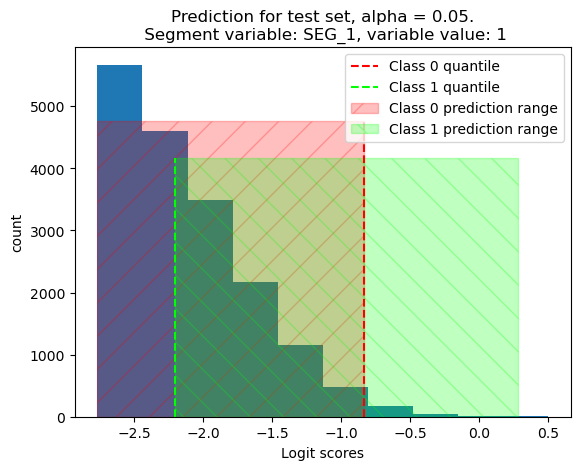

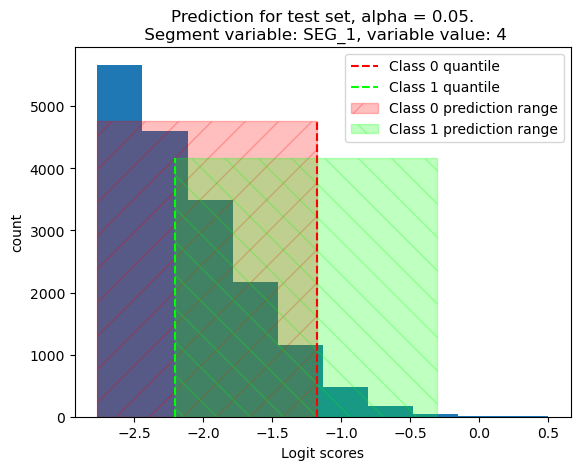

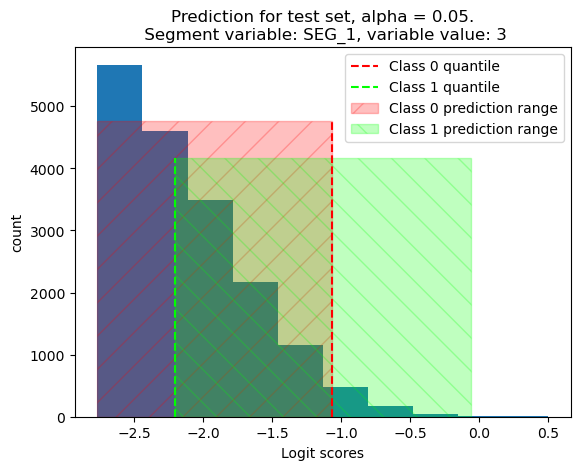

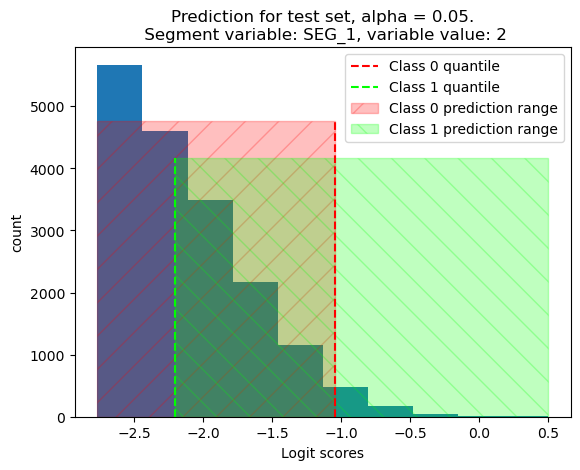

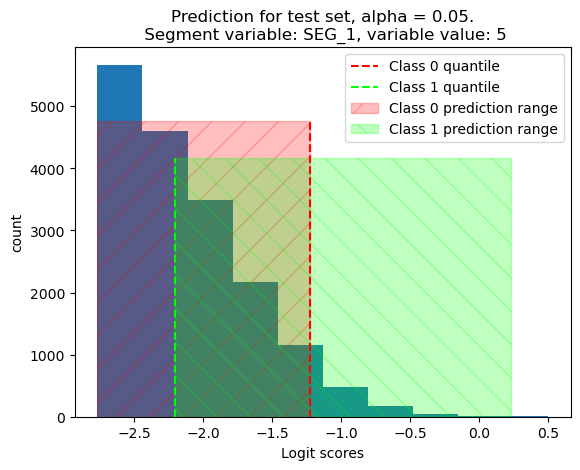

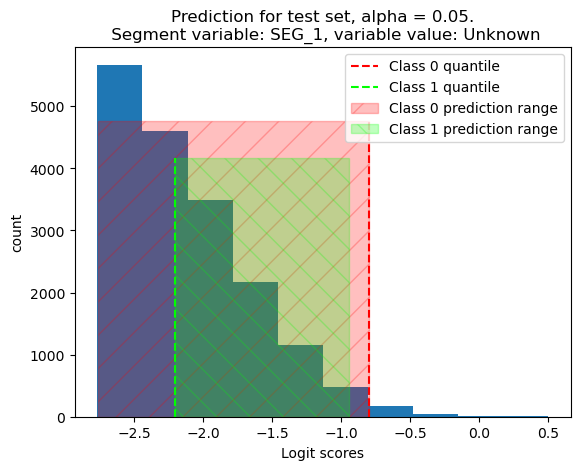

In [13]:
#histogramy z przyporządkowaniem dla zbioru testowego
for unique_val in test[seg_variable].unique():
    X_test_sub = X_test[test[seg_variable]==unique_val]
    plt.hist(logit_hist(X_test))
    #plt.xlim(xmin = 0.000001, xmax = 0.99999)
    xmin, xmax, ymin, ymax = plt.axis()
    plt.axvline(x=logit_hist(class_0_quantiles[list(list_unique).index(unique_val)]),ymin=ymin, ymax=0.8, label = f'Class 0 quantile',color = 'r', linestyle = '--')
    plt.axvline(x=logit_hist(1-class_1_quantiles[list(list_unique).index(unique_val)]),ymin=0, ymax=0.7, label = f'Class 1 quantile',color = 'lime', linestyle = '--')
    plt.axvspan(xmin = logit_hist(np.min(X_test_sub)), xmax = logit_hist(class_0_quantiles[list(list_unique).index(unique_val)]),ymin = 0, ymax = 0.8, color='red', alpha=0.25, label = 'Class 0 prediction range', hatch = '/')
    plt.axvspan(xmin = logit_hist(1-class_1_quantiles[list(list_unique).index(unique_val)]), xmax = logit_hist(np.max(X_test_sub)),ymin = ymin, ymax = 0.7, color='lime', alpha=0.25, label = 'Class 1 prediction range', hatch = '\\')
    #plt.xscale('logit')
    plt.xlabel('Logit scores')
    plt.ylabel('count')
    plt.title(f'Prediction for test set, alpha = {alpha_seg}.\n Segment variable: {seg_variable}, variable value: {unique_val}')
    plt.legend(loc = 'upper right')
    plt.show()